<a href="https://colab.research.google.com/github/leoprasel/Portfolio/blob/main/Copy_of_YOLO_v4_Detec%C3%A7%C3%A3o_de_objetos_com_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [ ]:
import cv2
print(cv2.__version__)

4.8.0


In [ ]:
#!pip install opencv-python==4.4.0.40

In [ ]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.8.0


## Etapa 2 - Conectando com o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Etapa 3 - Carregando os arquivos do modelo treinado

In [ ]:
path = '/content/gdrive/My Drive/recursos/YOLO/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
labels_path

'/content/cfg/coco.names'

In [ ]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
len(LABELS)

80

In [ ]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [ ]:
net = cv2.dnn.readNet(config_path, weights_path)

In [ ]:
net

<dnn_Net 0x7f2935c69410>

## Etapa 4 - Definindo mais configurações para a detecção

In [ ]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[ 96  25  50]
 [105 200 247]
 [ 25 143 230]
 [ 75 209  96]
 [ 33 116 253]
 [ 92 201 162]
 [ 34 254  91]
 [ 98 246  28]
 [ 83  96   4]
 [110  37  48]
 [197   8  91]
 [243  81 172]
 [ 19 146 164]
 [214  65  32]
 [ 45 232 251]
 [206 178 252]
 [253 177  59]
 [222 147  32]
 [142 178 185]
 [  7  75 195]
 [ 92  82 207]
 [135  67 179]
 [ 44 215 208]
 [  4 144  28]
 [115  47 167]
 [132  41 112]
 [ 78 104 100]
 [  8  54 155]
 [ 29  11 213]
 [ 37 132  72]
 [ 96 206  55]
 [ 16 189 223]
 [ 47   1 186]
 [128 148  62]
 [133  99  81]
 [ 75 184 165]
 [228  66  43]
 [188 138 230]
 [148 139 194]
 [254  15  13]
 [105 174 204]
 [217 161 218]
 [223  97 168]
 [185 183  53]
 [144  93  81]
 [252  55 244]
 [ 37  40 217]
 [254  16 139]
 [ 59 101 164]
 [186  92  95]
 [ 87  51 160]
 [ 67 169  82]
 [200 210 143]
 [ 40 185  19]
 [144 205  87]
 [ 66 209 185]
 [149  31 177]
 [ 19  55  77]
 [ 84 128 153]
 [243 215 201]
 [ 68 222 219]
 [101  57  80]
 [ 43  98 100]
 [171 212 158]
 [159 127 211]
 [237 134 172]
 [ 61 180 

In [ ]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('Total de camadas: ' + str(len(ln)))

Todas as camadas
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [ ]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[327 353 379]


**`[ ! ] Atenção:`** se estiver executando na versão 3.10 do Python (ou superior) troque `ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]` por:
> `ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]`

No segundo semestre de 2023, o Colab passou a atribuir automaticamente o Python 3.10 às sessões, portanto deixaremos assim

In [ ]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

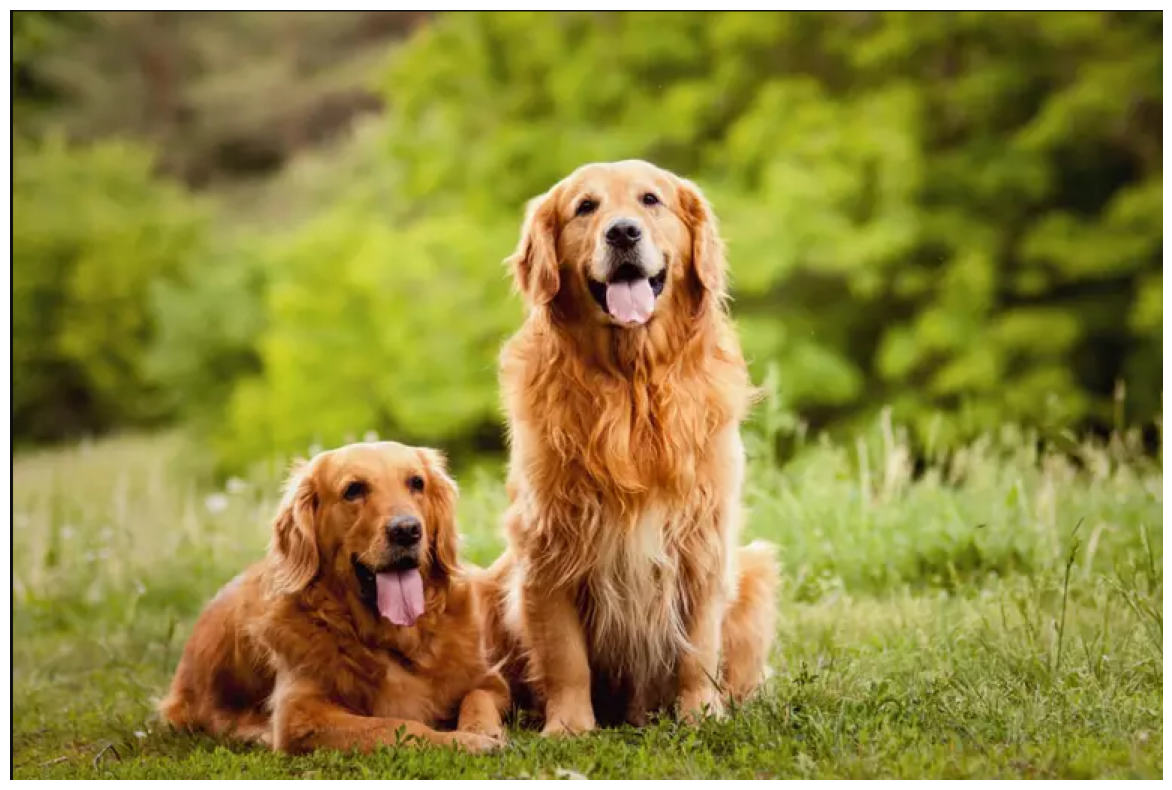

In [ ]:
imagem = cv2.imread('/content/gdrive/My Drive/recursos/YOLO/dogs.png')
mostrar(imagem)

In [ ]:
type(imagem)

numpy.ndarray

In [ ]:
print(imagem)

[[[ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]]

 [[ 14  14  14]
  [ 14  14  14]
  [ 17  82  78]
  ...
  [ 18  80  77]
  [ 17  79  76]
  [ 14  77  73]]

 [[ 14  14  14]
  [ 14  14  14]
  [ 17  82  78]
  ...
  [ 16  76  73]
  [ 15  75  72]
  [ 13  73  70]]

 ...

 [[ 14  14  14]
  [ 14  14  14]
  [ 15 118 117]
  ...
  [ 38 128 123]
  [ 41 127 122]
  [ 47 128 124]]

 [[ 14  14  14]
  [ 14  14  14]
  [ 15 121 119]
  ...
  [ 37 127 122]
  [ 36 122 117]
  [ 42 123 119]]

 [[ 14  14  14]
  [ 14  14  14]
  [ 20 125 124]
  ...
  [ 34 125 119]
  [ 34 120 115]
  [ 37 120 116]]]


In [ ]:
imagem_cp = imagem.copy()

In [ ]:
imagem.shape

(513, 768, 3)

In [ ]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 513
Largura: 768


## Etapa 6 - Processando a imagem de entrada

In [ ]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('YOLO levou {:.2f} segundos'.format(termino - inicio))

YOLO levou 5.17 segundos


## Etapa 7 - Definindo as variáveis

In [ ]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

## Etapa 8 - Realizando a predição

In [ ]:
len(layer_outputs)

3

In [ ]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.00892718, 0.00966725, 0.01963027, ..., 0.        , 0.        ,
         0.        ],
        [0.01355164, 0.01653002, 0.033636  , ..., 0.        , 0.        ,
         0.        ],
        [0.01585368, 0.01493183, 0.06523363, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9916573 , 0.9895679 , 0.02139227, ..., 0.        , 0.        ,
         0.        ],
        [0.9874795 , 0.983869  , 0.03538904, ..., 0.        , 0.        ,
         0.        ],
        [0.98410124, 0.98597056, 0.07377208, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 8112)

In [ ]:
layer_outputs[1]

array([[0.03160046, 0.03324227, 0.08506731, ..., 0.        , 0.        ,
        0.        ],
       [0.03348372, 0.03334201, 0.11316282, ..., 0.        , 0.        ,
        0.        ],
       [0.03228543, 0.03376256, 0.126457  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97064877, 0.9666052 , 0.06799903, ..., 0.        , 0.        ,
        0.        ],
       [0.9653553 , 0.96752954, 0.08683468, ..., 0.        , 0.        ,
        0.        ],
       [0.9655527 , 0.9656465 , 0.08852974, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
layer_outputs[2], layer_outputs[2][0], len(layer_outputs[2][0])

(array([[0.06632233, 0.0682246 , 0.23281977, ..., 0.        , 0.        ,
         0.        ],
        [0.05655585, 0.05508843, 0.37219107, ..., 0.        , 0.        ,
         0.        ],
        [0.03077344, 0.05284453, 0.7625445 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9401114 , 0.9369439 , 0.2453041 , ..., 0.        , 0.        ,
         0.        ],
        [0.93778664, 0.93881   , 0.34522894, ..., 0.        , 0.        ,
         0.        ],
        [0.9592765 , 0.9617615 , 0.6011971 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.6322334e-02, 6.8224601e-02, 2.3281977e-01, 3.7406686e-01,
        1.4990692e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [ ]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
LABELS[16]

'dog'

In [ ]:
np.argmax(np.array([0.10, 0.80, 0.10]))

1

In [ ]:
teste = np.array([0.10, 0.80, 0.10])

In [ ]:
teste[1]

0.8

In [ ]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.7287653 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]
classe mais provável: 16
confiança: 0.7287653
scores: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.96815765 0.
 0.         0.         0.

In [ ]:
print(caixas), len(caixas)

[[319, 110, 183, 360], [324, 111, 193, 361], [318, 116, 185, 368], [323, 114, 194, 371], [101, 285, 239, 210], [100, 286, 240, 217], [315, 107, 192, 371], [315, 103, 192, 380], [324, 102, 190, 381], [324, 100, 189, 383], [94, 289, 247, 203], [94, 289, 249, 204], [93, 291, 250, 208], [94, 290, 250, 209], [319, 110, 183, 360], [324, 111, 193, 361], [318, 116, 185, 368], [323, 114, 194, 371], [101, 285, 239, 210], [100, 286, 240, 217], [315, 107, 192, 371], [315, 103, 192, 380], [324, 102, 190, 381], [324, 100, 189, 383], [94, 289, 247, 203], [94, 289, 249, 204], [93, 291, 250, 208], [94, 290, 250, 209]]


(None, 28)

In [ ]:
print(confiancas), len(confiancas)

[0.7287653088569641, 0.9681576490402222, 0.7952355146408081, 0.9704233407974243, 0.9879473447799683, 0.8291118144989014, 0.9517897367477417, 0.9531606435775757, 0.9933858513832092, 0.9938827157020569, 0.9928786158561707, 0.9933070540428162, 0.9151239991188049, 0.9193127751350403, 0.7287653088569641, 0.9681576490402222, 0.7952355146408081, 0.9704233407974243, 0.9879473447799683, 0.8291118144989014, 0.9517897367477417, 0.9531606435775757, 0.9933858513832092, 0.9938827157020569, 0.9928786158561707, 0.9933070540428162, 0.9151239991188049, 0.9193127751350403]


(None, 28)

In [ ]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 28)

## Etapa 9 - Aplicando a Non-Maxima Suppression

In [ ]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [ ]:
objs

array([ 9, 11], dtype=int32)

In [ ]:
print(objs.flatten())

[ 7 15 11]


In [ ]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869317412376404, 0.9824252128601074, 0.9767158627510071)

In [ ]:
confiancas[0]

0.6059529781341553

## Etapa 10 - Mostrando o resultado da detecção na imagem

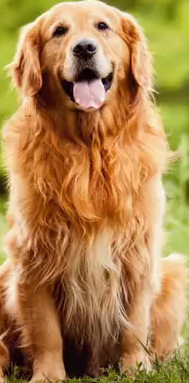

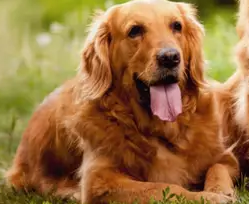

In [ ]:
if len(objs) > 0:
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]]

    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

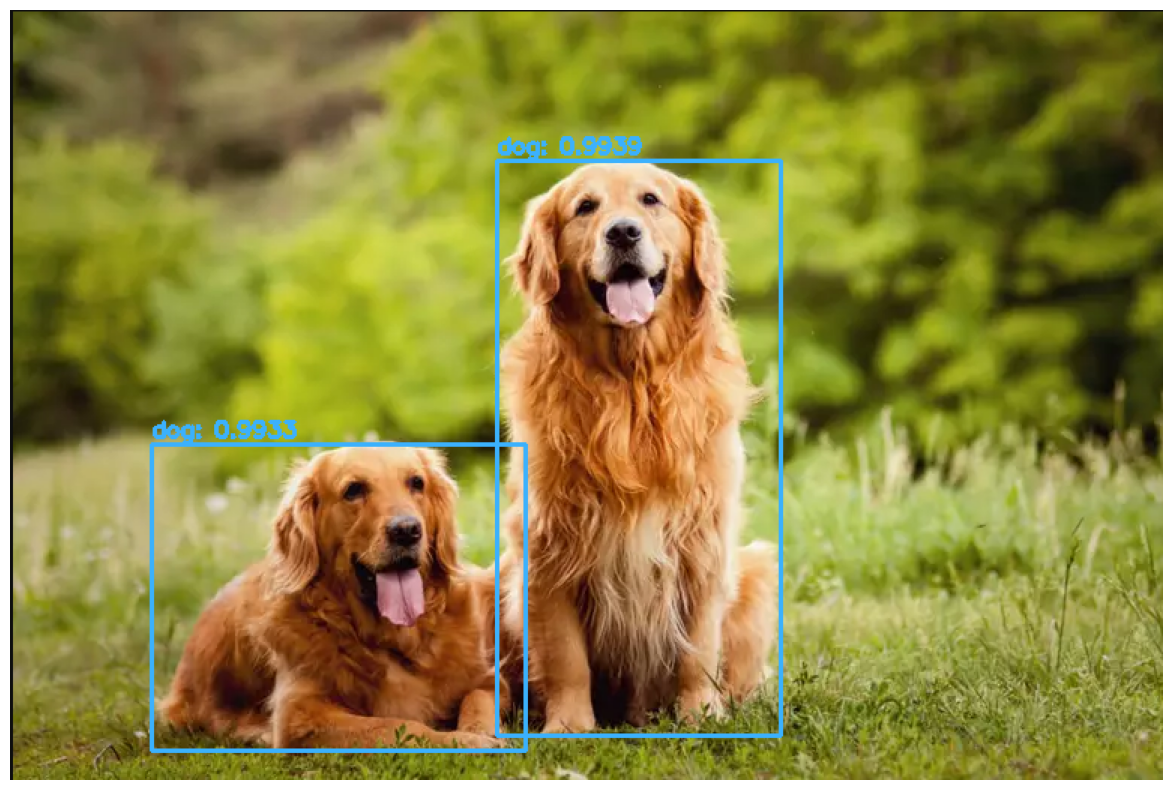

In [ ]:
mostrar(imagem)

In [ ]:
cv2.imwrite('resultado.jpg', imagem)

True

In [ ]:
!cp ./resultado.jpg /content/gdrive/My\ Drive/recursos/YOLO/resultado_cachorro.jpg